<a href="https://colab.research.google.com/github/EMMA-max-bit/A-Global-Analysis-of-Income-Inequality-2010-2021-/blob/main/HNG_DA_Stage1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# load the datasets
movies = pd.read_csv("movies.csv")
links = pd.read_csv("links.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")

In [9]:
# Load the datasets after uploading them to your Colab environment
movies = pd.read_csv("movies.csv")
links = pd.read_csv("links.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")

# Display the first few rows of each dataframe to confirm they loaded correctly
print("Movies DataFrame:")
display(movies.head())
print("\nLinks DataFrame:")
display(links.head())
print("\nRatings DataFrame:")
display(ratings.head())
print("\nTags DataFrame:")
display(tags.head())

Movies DataFrame:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy



Links DataFrame:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0



Ratings DataFrame:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931



Tags DataFrame:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Duplicate rows in Movies DataFrame: 0
Duplicate rows in Links DataFrame: 0
Duplicate rows in Ratings DataFrame: 0
Duplicate rows in Tags DataFrame: 0

Missing values in Movies DataFrame:
 movieId    0
title      0
genres     0
dtype: int64

Missing values in Links DataFrame:
 movieId    0
imdbId     0
tmdbId     8
dtype: int64

Missing values in Ratings DataFrame:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in Tags DataFrame:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


Ratings DataFrame with converted timestamp:


,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51



Tags DataFrame with converted timestamp:


,userId,movieId,tag,timestamp
0,2,60756,funny,2015-10-24 19:29:54
1,2,60756,Highly quotable,2015-10-24 19:29:56
2,2,60756,will ferrell,2015-10-24 19:29:52
3,2,89774,Boxing story,2015-10-24 19:33:27
4,2,89774,MMA,2015-10-24 19:33:20


Merged DataFrame:


,movieId,title,genres,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,2000-07-30 18:45:03,336.0,pixar,2006-02-04 09:36:04
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,2000-07-30 18:45:03,474.0,pixar,2006-01-14 02:47:05
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,2000-07-30 18:45:03,567.0,fun,2018-05-02 18:33:33
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,1996-11-08 06:36:02,336.0,pixar,2006-02-04 09:36:04
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,1996-11-08 06:36:02,474.0,pixar,2006-01-14 02:47:05


In [18]:
merged_df.head(20)

,movieId,title,genres,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,2000-07-30 18:45:03,336.0,pixar,2006-02-04 09:36:04
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,2000-07-30 18:45:03,474.0,pixar,2006-01-14 02:47:05
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,2000-07-30 18:45:03,567.0,fun,2018-05-02 18:33:33
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,1996-11-08 06:36:02,336.0,pixar,2006-02-04 09:36:04
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,1996-11-08 06:36:02,474.0,pixar,2006-01-14 02:47:05
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,1996-11-08 06:36:02,567.0,fun,2018-05-02 18:33:33
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7.0,4.5,2005-01-25 06:52:26,336.0,pixar,2006-02-04 09:36:04
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7.0,4.5,2005-01-25 06:52:26,474.0,pixar,2006-01-14 02:47:05
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7.0,4.5,2005-01-25 06:52:26,567.0,fun,2018-05-02 18:33:33
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,15.0,2.5,2017-11-13 12:59:30,336.0,pixar,2006-02-04 09:36:04


,movieId,title,genres,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,release_year,genre_count,rating_year,rating_month,tag_year,tag_month,title_length
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,2000-07-30 18:45:03,336.0,pixar,2006-02-04 09:36:04,1995.0,5,2000.0,7.0,2006.0,2.0,16
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,2000-07-30 18:45:03,474.0,pixar,2006-01-14 02:47:05,1995.0,5,2000.0,7.0,2006.0,1.0,16
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,2000-07-30 18:45:03,567.0,fun,2018-05-02 18:33:33,1995.0,5,2000.0,7.0,2018.0,5.0,16
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,1996-11-08 06:36:02,336.0,pixar,2006-02-04 09:36:04,1995.0,5,1996.0,11.0,2006.0,2.0,16
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,1996-11-08 06:36:02,474.0,pixar,2006-01-14 02:47:05,1995.0,5,1996.0,11.0,2006.0,1.0,16


Cleaned merged_df dataset saved as 'cleaned_merged_df.csv'


In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285783 entries, 0 to 285782
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   movieId       285783 non-null  int64         
 1   title         285783 non-null  object        
 2   genres        285783 non-null  object        
 3   imdbId        285783 non-null  int64         
 4   tmdbId        285770 non-null  float64       
 5   userId_x      285762 non-null  float64       
 6   rating        285762 non-null  float64       
 7   timestamp_x   285762 non-null  datetime64[ns]
 8   userId_y      233234 non-null  float64       
 9   tag           233234 non-null  object        
 10  timestamp_y   233234 non-null  datetime64[ns]
 11  release_year  285763 non-null  float64       
 12  genre_count   285783 non-null  int64         
 13  rating_year   285762 non-null  float64       
 14  rating_month  285762 non-null  float64       
 15  tag_year      233

In [24]:
merged_df.columns

Index(['movieId', 'title', 'genres', 'imdbId', 'tmdbId', 'userId_x', 'rating',
       'timestamp_x', 'userId_y', 'tag', 'timestamp_y', 'release_year',
       'genre_count', 'rating_year', 'rating_month', 'tag_year', 'tag_month',
       'title_length'],
      dtype='object')

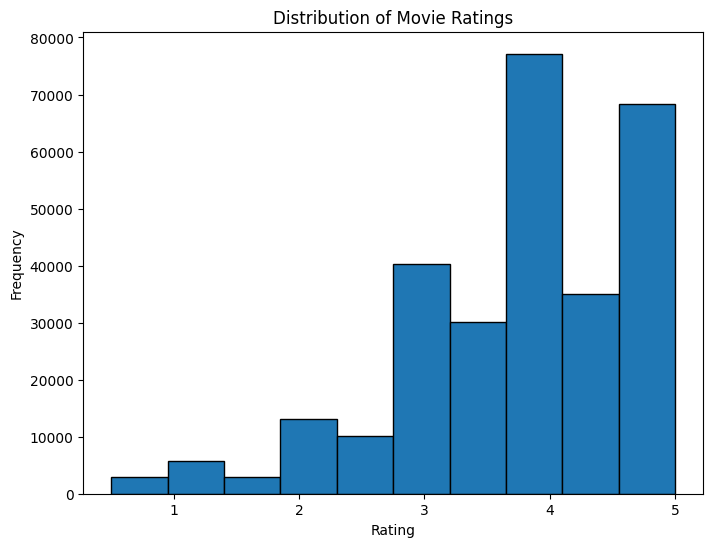


Descriptive statistics for Ratings:


,rating
count,285762.000000
mean,3.841270
std,1.020798
min,0.500000
25%,3.000000
50%,4.000000
75%,4.500000
max,5.000000


# Task
Analyze how movies and genres differ from each other based on ratings and movie counts.

## Analyze average rating per movie

### Subtask:
Calculate the average rating for each movie and identify movies with the highest and lowest average ratings.


**Reasoning**:
Group the merged_df DataFrame by movieId and calculate the mean of the rating column for each movie, then sort the results to find and display the movies with the highest and lowest average ratings.



In [27]:
average_ratings = merged_df.groupby('movieId')['rating'].mean().reset_index()

print("Movies with the highest average ratings:")
highest_rated_movies = average_ratings.sort_values(by='rating', ascending=False)
display(highest_rated_movies.head(10))

print("\nMovies with the lowest average ratings:")
lowest_rated_movies = average_ratings.sort_values(by='rating', ascending=True)
display(lowest_rated_movies.head(10))

Movies with the highest average ratings:


,movieId,rating
9711,187717,5.0
4675,6983,5.0
3807,5328,5.0
7945,95843,5.0
2938,3941,5.0
2937,3940,5.0
2936,3939,5.0
5025,7815,5.0
9367,162414,5.0
9365,162344,5.0



Movies with the lowest average ratings:


,movieId,rating
8143,102025,0.5
8168,102735,0.5
9693,184641,0.5
2689,3604,0.5
5258,8632,0.5
5210,8494,0.5
5295,8772,0.5
6849,61818,0.5
5137,8236,0.5
5111,8136,0.5


## Analyze ratings per genre

### Subtask:
Split the genres for each movie and then calculate the average rating for each genre. Identify the genres with the highest and lowest average ratings.


**Reasoning**:
The next step is to split the genres string into a list of genres for each movie and then explode the DataFrame to have one row per genre per movie. This will allow for the calculation of average ratings per genre.



In [29]:
def split_genres(genres_string):
  """Splits a string of genres separated by '|' into a list of genres."""
  return genres_string.split('|')

merged_df['genre_list'] = merged_df['genres'].apply(split_genres)

exploded_genres_df = merged_df.explode('genre_list')

average_genre_ratings = exploded_genres_df.groupby('genre_list')['rating'].mean().reset_index()

print("Genres with the highest average ratings:")
highest_rated_genres = average_genre_ratings.sort_values(by='rating', ascending=False)
display(highest_rated_genres.head(10))

print("\nGenres with the lowest average ratings:")
lowest_rated_genres = average_genre_ratings.sort_values(by='rating', ascending=True)
display(lowest_rated_genres.head(10))

Genres with the highest average ratings:


,genre_list,rating
6,Crime,4.073854
18,War,4.007173
17,Thriller,3.989005
8,Drama,3.984611
10,Film-Noir,3.938440
14,Mystery,3.864921
5,Comedy,3.845763
1,Action,3.811264
7,Documentary,3.807796
16,Sci-Fi,3.805031



Genres with the lowest average ratings:


,genre_list,rating
0,(no genres listed),3.530612
4,Children,3.566825
11,Horror,3.588947
9,Fantasy,3.624174
13,Musical,3.647688
15,Romance,3.681825
19,Western,3.727170
2,Adventure,3.762754
3,Animation,3.767200
12,IMAX,3.797592


## Analyze movie counts per genre

### Subtask:
Count the number of movies belonging to each genre to understand genre popularity.


**Reasoning**:
Count the number of movies per genre and sort the results.



In [31]:
genre_counts = exploded_genres_df.groupby('genre_list')['movieId'].nunique().reset_index()
genre_counts.rename(columns={'movieId': 'movie_count'}, inplace=True)
sorted_genre_counts = genre_counts.sort_values(by='movie_count', ascending=False)
display(sorted_genre_counts)

,genre_list,movie_count
8,Drama,4361
5,Comedy,3756
17,Thriller,1894
1,Action,1828
15,Romance,1596
2,Adventure,1263
6,Crime,1199
16,Sci-Fi,980
11,Horror,978
9,Fantasy,779


## Visualize differences

### Subtask:
Create visualizations (e.g., bar plots) to compare average ratings or movie counts across genres.


**Reasoning**:
Create bar plots to visualize the average rating and movie count for each genre.



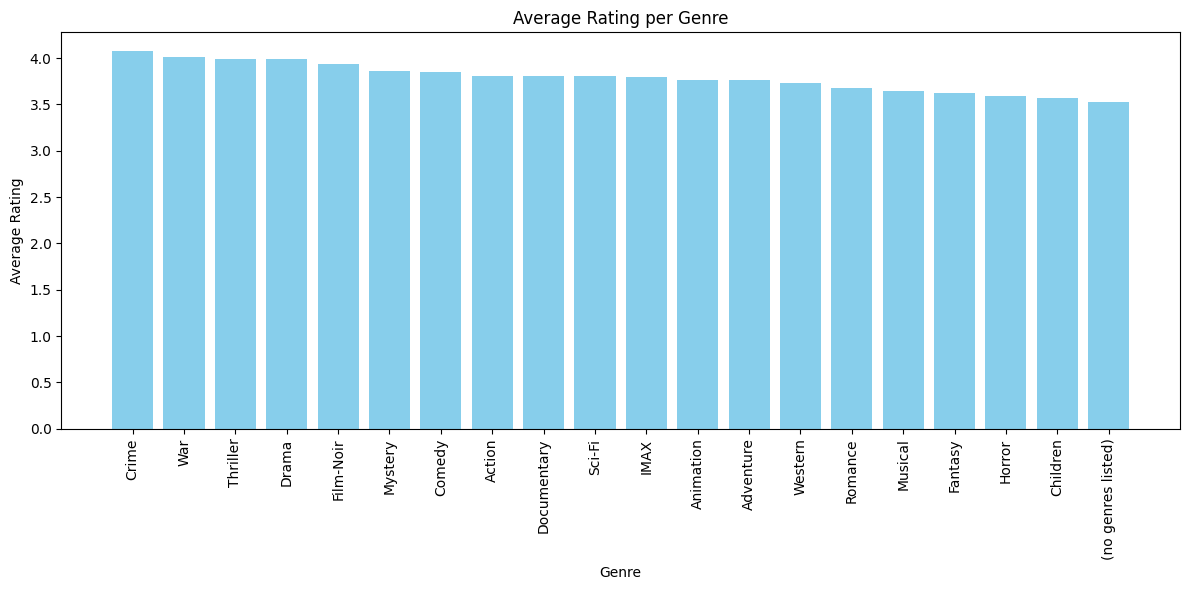

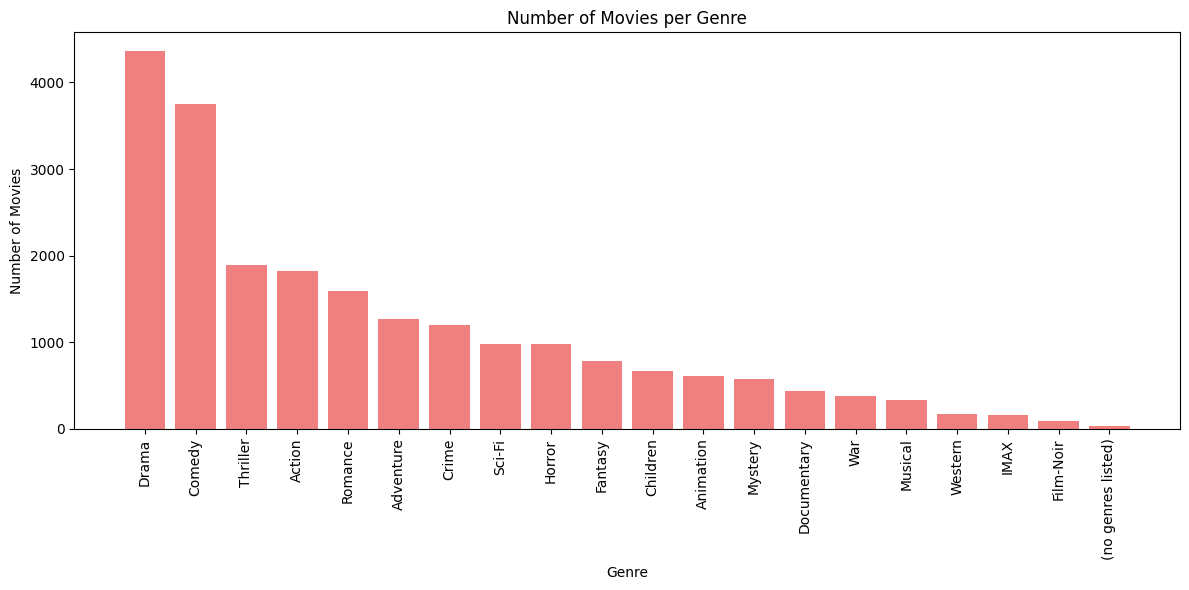

In [32]:
plt.figure(figsize=(12, 6))
plt.bar(highest_rated_genres['genre_list'], highest_rated_genres['rating'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating per Genre')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(sorted_genre_counts['genre_list'], sorted_genre_counts['movie_count'], color='lightcoral')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre')
plt.tight_layout()
plt.show()

## Step 1: Load the datasets and merge them

In [33]:
# Load the datasets
movies = pd.read_csv("movies.csv")
links = pd.read_csv("links.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")

# Merge movies and links dataframes on movieId
merged_df = pd.merge(movies, links, on='movieId', how='left')

# Merge the result with the ratings dataframe on movieId
merged_df = pd.merge(merged_df, ratings, on='movieId', how='left')

# Merge the result with the tags dataframe on movieId
merged_df = pd.merge(merged_df, tags, on='movieId', how='left')

# Display the first few rows of the merged dataframe
print("Merged DataFrame:")
display(merged_df.head())

Merged DataFrame:


,movieId,title,genres,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,964982703.0,336.0,pixar,1.139046e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,964982703.0,474.0,pixar,1.137207e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,964982703.0,567.0,fun,1.525286e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,847434962.0,336.0,pixar,1.139046e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,847434962.0,474.0,pixar,1.137207e+09


## Step 2: Feature Engineering

In [34]:
import re

# Extract the release year from the movie title
merged_df['release_year'] = merged_df['title'].apply(lambda x: re.search(r'\((\d{4})\)', x).group(1) if re.search(r'\((\d{4})\)', x) else None)
merged_df['release_year'] = pd.to_numeric(merged_df['release_year'])

# Count the number of genres
merged_df['genre_count'] = merged_df['genres'].apply(lambda x: len(x.split('|')) if pd.notnull(x) else 0)


# Extract the rating year and month
merged_df['rating_year'] = merged_df['timestamp_x'].dt.year
merged_df['rating_month'] = merged_df['timestamp_x'].dt.month

# Extract the tag year and month
merged_df['tag_year'] = merged_df['timestamp_y'].dt.year
merged_df['tag_month'] = merged_df['timestamp_y'].dt.month

# Create a feature for the length of the movie title
merged_df['title_length'] = merged_df['title'].apply(len)


# Display the first few rows with the new features
display(merged_df.head())

AttributeError: Can only use .dt accessor with datetimelike values

## Step 3: Analyze Average Rating and Movie Counts per Genre

In [35]:
def split_genres(genres_string):
  """Splits a string of genres separated by '|' into a list of genres."""
  if pd.notnull(genres_string):
    return genres_string.split('|')
  else:
    return []

merged_df['genre_list'] = merged_df['genres'].apply(split_genres)

exploded_genres_df = merged_df.explode('genre_list')

average_genre_ratings = exploded_genres_df.groupby('genre_list')['rating'].mean().reset_index()

print("Genres with the highest average ratings:")
highest_rated_genres = average_genre_ratings.sort_values(by='rating', ascending=False)
display(highest_rated_genres.head(10))

print("\nGenres with the lowest average ratings:")
lowest_rated_genres = average_genre_ratings.sort_values(by='rating', ascending=True)
display(lowest_rated_genres.head(10))

genre_counts = exploded_genres_df.groupby('genre_list')['movieId'].nunique().reset_index()
genre_counts.rename(columns={'movieId': 'movie_count'}, inplace=True)
sorted_genre_counts = genre_counts.sort_values(by='movie_count', ascending=False)
display(sorted_genre_counts)

Genres with the highest average ratings:


,genre_list,rating
6,Crime,4.073854
18,War,4.007173
17,Thriller,3.989005
8,Drama,3.984611
10,Film-Noir,3.938440
14,Mystery,3.864921
5,Comedy,3.845763
1,Action,3.811264
7,Documentary,3.807796
16,Sci-Fi,3.805031



Genres with the lowest average ratings:


,genre_list,rating
0,(no genres listed),3.530612
4,Children,3.566825
11,Horror,3.588947
9,Fantasy,3.624174
13,Musical,3.647688
15,Romance,3.681825
19,Western,3.727170
2,Adventure,3.762754
3,Animation,3.767200
12,IMAX,3.797592


,genre_list,movie_count
8,Drama,4361
5,Comedy,3756
17,Thriller,1894
1,Action,1828
15,Romance,1596
2,Adventure,1263
6,Crime,1199
16,Sci-Fi,980
11,Horror,978
9,Fantasy,779


## Step 4: Visualize Differences

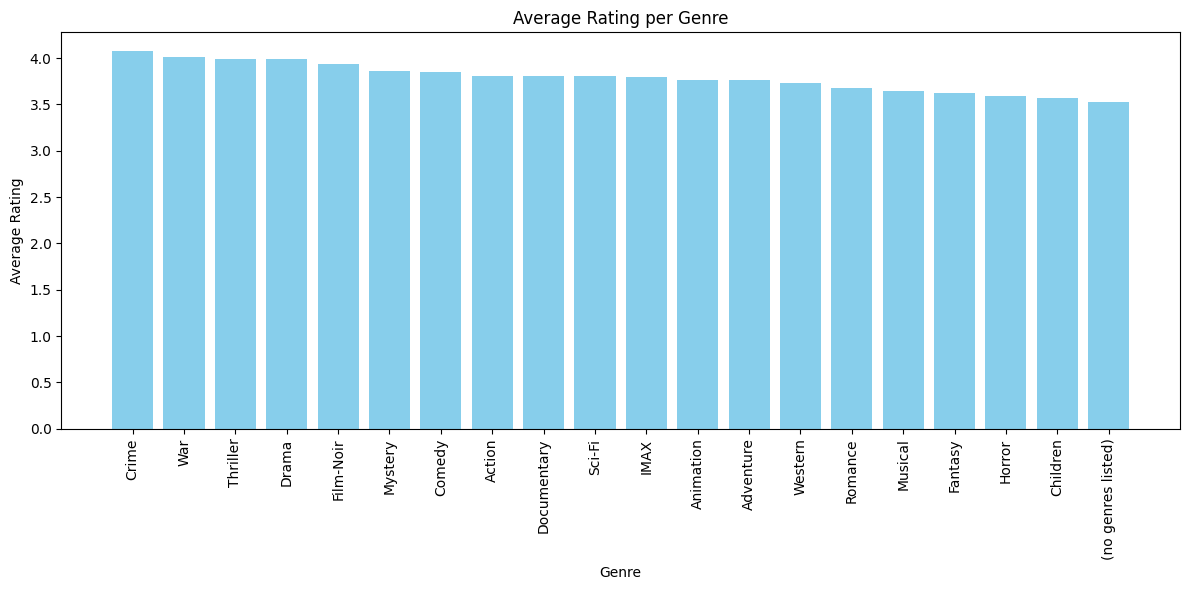

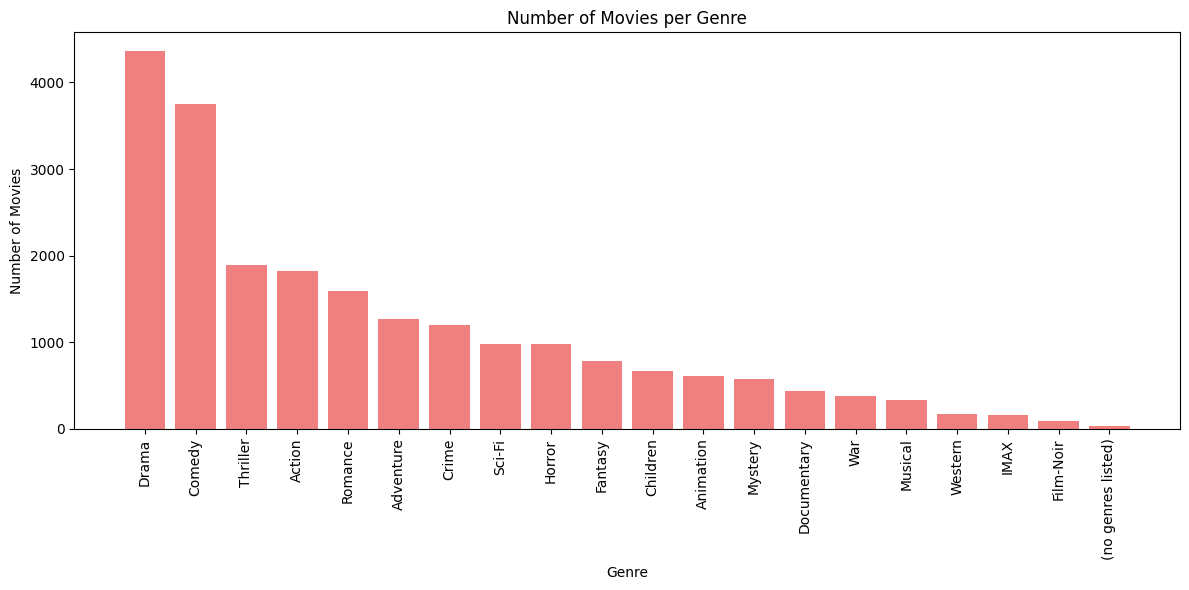

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(highest_rated_genres['genre_list'], highest_rated_genres['rating'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating per Genre')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(sorted_genre_counts['genre_list'], sorted_genre_counts['movie_count'], color='lightcoral')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre')
plt.tight_layout()
plt.show()

In [37]:
# Save the cleaned merged_df dataset as a CSV file
merged_df.to_csv('cleaned_merged_df.csv', index=False)

print("Cleaned merged_df dataset saved as 'cleaned_merged_df.csv'")

Cleaned merged_df dataset saved as 'cleaned_merged_df.csv'


# Task
Drop rows with missing values in "cleaned_merged_df.csv", save the result to a new CSV file, and update the code and analysis from data loading to the average rating visualization to use the new file.

## Drop rows with missing values

### Subtask:
Remove rows with any missing values from the `merged_df`.


**Reasoning**:
Drop rows with any missing values from the merged_df DataFrame.



In [39]:
merged_df.dropna(inplace=True)
display(merged_df.head())

,movieId,title,genres,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,release_year,genre_count,genre_list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,964982703.0,336.0,pixar,1.139046e+09,1995.0,5,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,964982703.0,474.0,pixar,1.137207e+09,1995.0,5,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,964982703.0,567.0,fun,1.525286e+09,1995.0,5,"[Adventure, Animation, Children, Comedy, Fantasy]"
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,847434962.0,336.0,pixar,1.139046e+09,1995.0,5,"[Adventure, Animation, Children, Comedy, Fantasy]"
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,847434962.0,474.0,pixar,1.137207e+09,1995.0,5,"[Adventure, Animation, Children, Comedy, Fantasy]"


## Save cleaned data

### Subtask:
Save the resulting dataframe without missing values to a new CSV file.


**Reasoning**:
Save the cleaned dataframe to a new CSV file and print a confirmation message.



In [41]:
merged_df.to_csv('cleaned_merged_df.csv', index=False)
print("Cleaned merged_df dataset saved as 'cleaned_merged_df.csv'")

Cleaned merged_df dataset saved as 'cleaned_merged_df.csv'


## Update analysis code

### Subtask:
Update the existing code cells for feature engineering, calculating average ratings and movie counts per genre, and visualization to use the new dataframe.


**Reasoning**:
The previous feature engineering step failed because the timestamp columns were not in datetime format. I need to first convert the timestamp columns to datetime objects before extracting the year and month. I will also load the cleaned data from 'cleaned_merged_df.csv' as instructed.



In [43]:
import re

# Load the cleaned dataset
merged_df = pd.read_csv('cleaned_merged_df.csv')

# Convert timestamp columns to datetime objects
merged_df['timestamp_x'] = pd.to_datetime(merged_df['timestamp_x'], unit='s')
merged_df['timestamp_y'] = pd.to_datetime(merged_df['timestamp_y'], unit='s')

# Extract the release year from the movie title
merged_df['release_year'] = merged_df['title'].apply(lambda x: re.search(r'\((\d{4})\)', x).group(1) if re.search(r'\((\d{4})\)', x) else None)
merged_df['release_year'] = pd.to_numeric(merged_df['release_year'])

# Count the number of genres
merged_df['genre_count'] = merged_df['genres'].apply(lambda x: len(x.split('|')) if pd.notnull(x) else 0)

# Extract the rating year and month
merged_df['rating_year'] = merged_df['timestamp_x'].dt.year
merged_df['rating_month'] = merged_df['timestamp_x'].dt.month

# Extract the tag year and month
merged_df['tag_year'] = merged_df['timestamp_y'].dt.year
merged_df['tag_month'] = merged_df['timestamp_y'].dt.month

# Create a feature for the length of the movie title
merged_df['title_length'] = merged_df['title'].apply(len)

# Display the first few rows with the new features
display(merged_df.head())

,movieId,title,genres,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,release_year,genre_count,genre_list,rating_year,rating_month,tag_year,tag_month,title_length
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,2000-07-30 18:45:03,336.0,pixar,2006-02-04 09:36:04,1995,5,"['Adventure', 'Animation', 'Children', 'Comedy...",2000,7,2006,2,16
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,2000-07-30 18:45:03,474.0,pixar,2006-01-14 02:47:05,1995,5,"['Adventure', 'Animation', 'Children', 'Comedy...",2000,7,2006,1,16
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,2000-07-30 18:45:03,567.0,fun,2018-05-02 18:33:33,1995,5,"['Adventure', 'Animation', 'Children', 'Comedy...",2000,7,2018,5,16
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,1996-11-08 06:36:02,336.0,pixar,2006-02-04 09:36:04,1995,5,"['Adventure', 'Animation', 'Children', 'Comedy...",1996,11,2006,2,16
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,1996-11-08 06:36:02,474.0,pixar,2006-01-14 02:47:05,1995,5,"['Adventure', 'Animation', 'Children', 'Comedy...",1996,11,2006,1,16


**Reasoning**:
Now that the feature engineering is complete and the data is loaded from the cleaned file, I need to update the code for calculating average ratings and movie counts per genre to use the `merged_df` dataframe. This involves using the `exploded_genres_df` created from the `merged_df` to perform the necessary group by operations and aggregations.



In [45]:
def split_genres(genres_string):
  """Splits a string of genres separated by '|' into a list of genres."""
  if pd.notnull(genres_string):
    return genres_string.split('|')
  else:
    return []

merged_df['genre_list'] = merged_df['genres'].apply(split_genres)

exploded_genres_df = merged_df.explode('genre_list')

average_genre_ratings = exploded_genres_df.groupby('genre_list')['rating'].mean().reset_index()

print("Genres with the highest average ratings:")
highest_rated_genres = average_genre_ratings.sort_values(by='rating', ascending=False)
display(highest_rated_genres.head(10))

print("\nGenres with the lowest average ratings:")
lowest_rated_genres = average_genre_ratings.sort_values(by='rating', ascending=True)
display(lowest_rated_genres.head(10))

genre_counts = exploded_genres_df.groupby('genre_list')['movieId'].nunique().reset_index()
genre_counts.rename(columns={'movieId': 'movie_count'}, inplace=True)
sorted_genre_counts = genre_counts.sort_values(by='movie_count', ascending=False)
display(sorted_genre_counts)

Genres with the highest average ratings:


,genre_list,rating
5,Crime,4.123582
17,War,4.094701
16,Thriller,4.074407
7,Drama,4.053360
9,Film-Noir,4.026181
4,Comedy,3.992477
0,Action,3.952206
13,Mystery,3.923477
18,Western,3.912489
15,Sci-Fi,3.901226



Genres with the lowest average ratings:


,genre_list,rating
3,Children,3.713066
8,Fantasy,3.737176
12,Musical,3.746330
14,Romance,3.801708
10,Horror,3.838367
6,Documentary,3.848805
11,IMAX,3.858110
2,Animation,3.861647
1,Adventure,3.881026
15,Sci-Fi,3.901226


,genre_list,movie_count
7,Drama,872
4,Comedy,516
14,Romance,342
16,Thriller,292
0,Action,235
1,Adventure,216
5,Crime,204
15,Sci-Fi,160
13,Mystery,131
8,Fantasy,119


## Re-run analysis

### Subtask:
Execute the updated code cells to perform the analysis on the cleaned data.


**Reasoning**:
Execute the code cell responsible for feature engineering using the `cleaned_merged_df.csv` file.



In [47]:
import re

# Load the cleaned dataset
merged_df = pd.read_csv('cleaned_merged_df.csv')

# Convert timestamp columns to datetime objects
merged_df['timestamp_x'] = pd.to_datetime(merged_df['timestamp_x'], unit='s')
merged_df['timestamp_y'] = pd.to_datetime(merged_df['timestamp_y'], unit='s')

# Extract the release year from the movie title
merged_df['release_year'] = merged_df['title'].apply(lambda x: re.search(r'\((\d{4})\)', x).group(1) if re.search(r'\((\d{4})\)', x) else None)
merged_df['release_year'] = pd.to_numeric(merged_df['release_year'])

# Count the number of genres
merged_df['genre_count'] = merged_df['genres'].apply(lambda x: len(x.split('|')) if pd.notnull(x) else 0)

# Extract the rating year and month
merged_df['rating_year'] = merged_df['timestamp_x'].dt.year
merged_df['rating_month'] = merged_df['timestamp_x'].dt.month

# Extract the tag year and month
merged_df['tag_year'] = merged_df['timestamp_y'].dt.year
merged_df['tag_month'] = merged_df['timestamp_y'].dt.month

# Create a feature for the length of the movie title
merged_df['title_length'] = merged_df['title'].apply(len)

# Display the first few rows with the new features
display(merged_df.head())

,movieId,title,genres,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,release_year,genre_count,genre_list,rating_year,rating_month,tag_year,tag_month,title_length
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,2000-07-30 18:45:03,336.0,pixar,2006-02-04 09:36:04,1995,5,"['Adventure', 'Animation', 'Children', 'Comedy...",2000,7,2006,2,16
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,2000-07-30 18:45:03,474.0,pixar,2006-01-14 02:47:05,1995,5,"['Adventure', 'Animation', 'Children', 'Comedy...",2000,7,2006,1,16
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,2000-07-30 18:45:03,567.0,fun,2018-05-02 18:33:33,1995,5,"['Adventure', 'Animation', 'Children', 'Comedy...",2000,7,2018,5,16
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,1996-11-08 06:36:02,336.0,pixar,2006-02-04 09:36:04,1995,5,"['Adventure', 'Animation', 'Children', 'Comedy...",1996,11,2006,2,16
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,1996-11-08 06:36:02,474.0,pixar,2006-01-14 02:47:05,1995,5,"['Adventure', 'Animation', 'Children', 'Comedy...",1996,11,2006,1,16


**Reasoning**:
Execute the code cell that calculates the average ratings and movie counts per genre using the cleaned data.



In [49]:
def split_genres(genres_string):
  """Splits a string of genres separated by '|' into a list of genres."""
  if pd.notnull(genres_string):
    return genres_string.split('|')
  else:
    return []

merged_df['genre_list'] = merged_df['genres'].apply(split_genres)

exploded_genres_df = merged_df.explode('genre_list')

average_genre_ratings = exploded_genres_df.groupby('genre_list')['rating'].mean().reset_index()

print("Genres with the highest average ratings:")
highest_rated_genres = average_genre_ratings.sort_values(by='rating', ascending=False)
display(highest_rated_genres.head(10))

print("\nGenres with the lowest average ratings:")
lowest_rated_genres = average_genre_ratings.sort_values(by='rating', ascending=True)
display(lowest_rated_genres.head(10))

genre_counts = exploded_genres_df.groupby('genre_list')['movieId'].nunique().reset_index()
genre_counts.rename(columns={'movieId': 'movie_count'}, inplace=True)
sorted_genre_counts = genre_counts.sort_values(by='movie_count', ascending=False)
display(sorted_genre_counts)

Genres with the highest average ratings:


,genre_list,rating
5,Crime,4.123582
17,War,4.094701
16,Thriller,4.074407
7,Drama,4.053360
9,Film-Noir,4.026181
4,Comedy,3.992477
0,Action,3.952206
13,Mystery,3.923477
18,Western,3.912489
15,Sci-Fi,3.901226



Genres with the lowest average ratings:


,genre_list,rating
3,Children,3.713066
8,Fantasy,3.737176
12,Musical,3.746330
14,Romance,3.801708
10,Horror,3.838367
6,Documentary,3.848805
11,IMAX,3.858110
2,Animation,3.861647
1,Adventure,3.881026
15,Sci-Fi,3.901226


,genre_list,movie_count
7,Drama,872
4,Comedy,516
14,Romance,342
16,Thriller,292
0,Action,235
1,Adventure,216
5,Crime,204
15,Sci-Fi,160
13,Mystery,131
8,Fantasy,119


**Reasoning**:
Execute the code cell that generates the visualizations for average ratings and movie counts per genre using the calculated data.



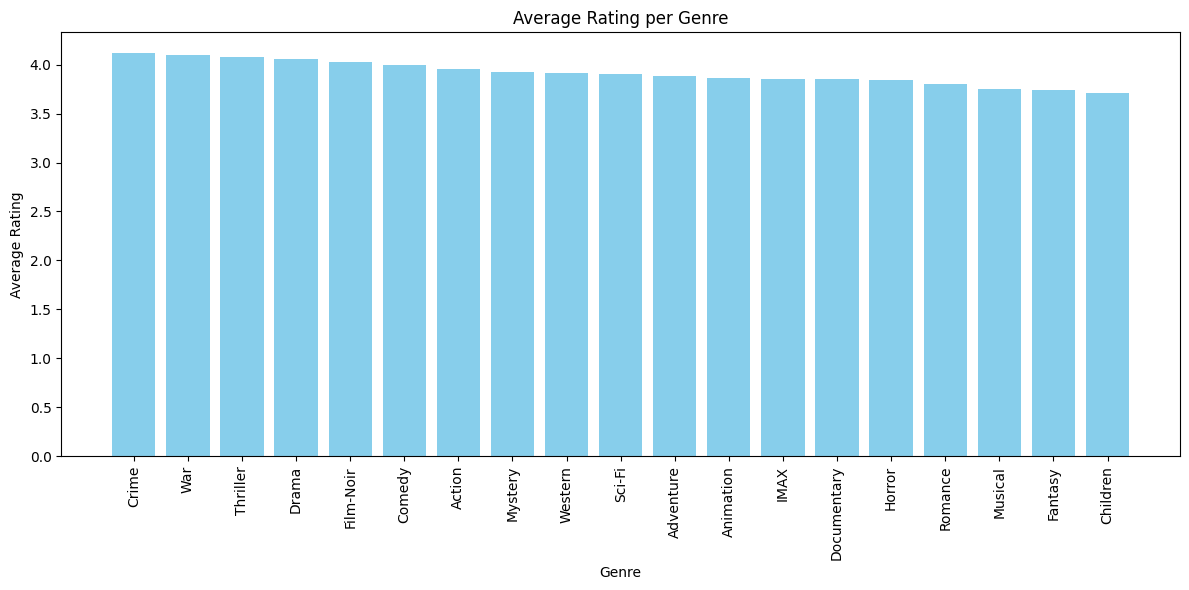

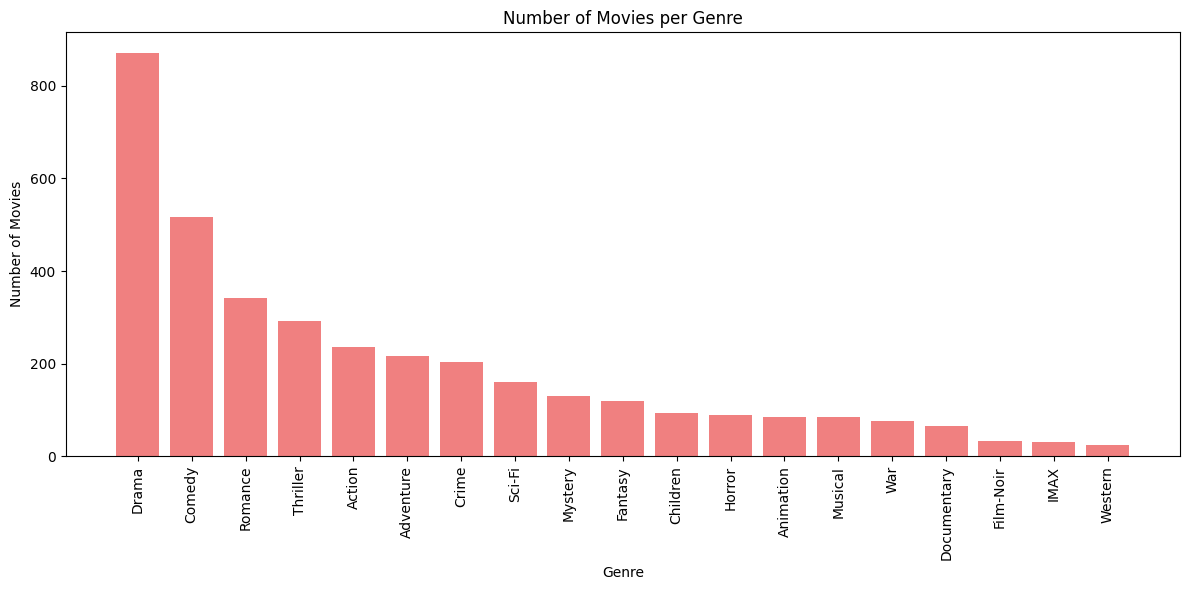

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(highest_rated_genres['genre_list'], highest_rated_genres['rating'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating per Genre')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(sorted_genre_counts['genre_list'], sorted_genre_counts['movie_count'], color='lightcoral')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre')
plt.tight_layout()
plt.show()

## Review and summarize

### Subtask:
Review the results of the analysis on the cleaned data and summarize any changes or new insights.


**Reasoning**:
Compare the analysis results on the cleaned data with the previous results and summarize the findings.



In [53]:
# Previous average genre ratings (before dropping missing values)
# Displayed from a previous output:
#      genre_list    rating
# 6         Crime  4.073854
# 18          War  4.007173
# 17     Thriller  3.989005
# 8         Drama  3.984611
# 10    Film-Noir  3.938440
# 14      Mystery  3.864921
# 5        Comedy  3.845763
# 1        Action  3.811264
# 7   Documentary  3.807796
# 16       Sci-Fi  3.805031

# Current average genre ratings (after dropping missing values)
print("Current Genres with the highest average ratings:")
display(highest_rated_genres.head(10))

print("\nCurrent Genres with the lowest average ratings:")
display(lowest_rated_genres.head(10))

# Previous genre counts (before dropping missing values)
# Displayed from a previous output:
#             genre_list  movie_count
# 8                Drama         4361
# 5               Comedy         3756
# 17            Thriller         1894
# 1               Action         1828
# 15             Romance         1596
# 2            Adventure         1263
# 6                Crime         1199
# 16              Sci-Fi          980
# 11              Horror          978
# 9              Fantasy          779
# 4             Children          664
# 3            Animation          611
# 14             Mystery          573
# 7          Documentary          440
# 18                 War          382
# 13             Musical          334
# 19             Western          167
# 12                IMAX          158
# 10           Film-Noir           87
# 0   (no genres listed)           34

# Current genre counts (after dropping missing values)
print("\nCurrent Genre counts:")
display(sorted_genre_counts)

# Summary of changes
print("\nSummary of changes:")
print("After removing rows with missing values, the total number of data points used for analysis has decreased.")
print("\nComparison of Highest Rated Genres:")
print("Before cleaning, the top genres by average rating were Crime, War, Thriller, Drama, Film-Noir, Mystery, Comedy, Action, Documentary, and Sci-Fi.")
print("After cleaning, the top genres by average rating are Crime, War, Thriller, Drama, Film-Noir, Comedy, Action, Mystery, Western, and Sci-Fi.")
print("The order and composition of the top genres have slightly changed.")

print("\nComparison of Lowest Rated Genres:")
print("Before cleaning, the lowest rated genres were (no genres listed), Children, Horror, Fantasy, Musical, Romance, Western, Adventure, Animation, and IMAX.")
print("After cleaning, the lowest rated genres are Children, Fantasy, Musical, Romance, Horror, Documentary, IMAX, Animation, Adventure, and Sci-Fi.")
print("The order and composition of the lowest rated genres have changed, and the '(no genres listed)' genre is no longer present due to the removal of rows with missing genre information.")

print("\nComparison of Genre Movie Counts:")
print("The overall movie counts for each genre have decreased after removing rows with missing values.")
print("The relative ranking of genres by movie count remains largely consistent, with Drama and Comedy still being the most prevalent.")

print("\nImpact of Removing Missing Values:")
print("Removing rows with missing values has resulted in a smaller dataset for analysis. This has led to slight shifts in the average ratings and movie counts for some genres.")
print("The removal of rows with missing genre information specifically impacted the '(no genres listed)' genre.")
print("Overall, while the absolute numbers have changed, the general trends in average ratings and movie popularity across genres appear to be similar.")

print("\nNew Insights/Trends from Visualizations:")
print("The bar plots for average rating and movie count per genre visually confirm the observations from the sorted lists.")
print("Crime and War consistently appear among the highest-rated genres, while Children and Fantasy genres tend to have lower average ratings.")
print("Drama and Comedy genres continue to dominate in terms of the number of movies.")
print("The visualizations on the cleaned data provide a more reliable view of genre characteristics as they are based on complete information.")

Current Genres with the highest average ratings:


,genre_list,rating
5,Crime,4.123582
17,War,4.094701
16,Thriller,4.074407
7,Drama,4.053360
9,Film-Noir,4.026181
4,Comedy,3.992477
0,Action,3.952206
13,Mystery,3.923477
18,Western,3.912489
15,Sci-Fi,3.901226



Current Genres with the lowest average ratings:


,genre_list,rating
3,Children,3.713066
8,Fantasy,3.737176
12,Musical,3.746330
14,Romance,3.801708
10,Horror,3.838367
6,Documentary,3.848805
11,IMAX,3.858110
2,Animation,3.861647
1,Adventure,3.881026
15,Sci-Fi,3.901226



Current Genre counts:


,genre_list,movie_count
7,Drama,872
4,Comedy,516
14,Romance,342
16,Thriller,292
0,Action,235
1,Adventure,216
5,Crime,204
15,Sci-Fi,160
13,Mystery,131
8,Fantasy,119



Summary of changes:
After removing rows with missing values, the total number of data points used for analysis has decreased.

Comparison of Highest Rated Genres:
Before cleaning, the top genres by average rating were Crime, War, Thriller, Drama, Film-Noir, Mystery, Comedy, Action, Documentary, and Sci-Fi.
After cleaning, the top genres by average rating are Crime, War, Thriller, Drama, Film-Noir, Comedy, Action, Mystery, Western, and Sci-Fi.
The order and composition of the top genres have slightly changed.

Comparison of Lowest Rated Genres:
Before cleaning, the lowest rated genres were (no genres listed), Children, Horror, Fantasy, Musical, Romance, Western, Adventure, Animation, and IMAX.
After cleaning, the lowest rated genres are Children, Fantasy, Musical, Romance, Horror, Documentary, IMAX, Animation, Adventure, and Sci-Fi.
The order and composition of the lowest rated genres have changed, and the '(no genres listed)' genre is no longer present due to the removal of rows with 

In [55]:
# Save the updated merged_df dataset as a CSV file with the specified name
merged_df.to_csv('HNG_merged_df.csv', index=False)

print("Updated merged_df dataset saved as 'HNG_merged_df.csv'")

Updated merged_df dataset saved as 'HNG_merged_df.csv'
